# Exploratory Data Analysis on Netflix Shows and Tv Dataset

In [78]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
#importing dataset
df = pd.read_csv(r'C:\Users\User\Desktop\Projects\EDA\Netflix\Dataset\netflix.csv')

In [81]:
df.shape

(8807, 12)

In [82]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [84]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [85]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [86]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [87]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [88]:
df['cast'] = df['cast'].fillna('Not Available')
df['director'] = df['director'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

In [89]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [90]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

In [91]:
#Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [92]:
#Split 'duration' into numeric and unit parts
df[['duration_num', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')

In [93]:
# Step 4: Value counts for key categorical features
print(df['type'].value_counts())         # Movie vs TV Show
print(df['rating'].value_counts())       # Ratings distribution
print(df['country'].value_counts().head(10))  # Top 10 countries
print(df['duration_unit'].value_counts())     # Duration unit distribution

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64
duration_unit
min        6128
Season     1793
Seasons     883
Name: count, dtype: int64


In [94]:
# Step 5: Count top genres
from collections import Counter

genres = ','.join(df['listed_in'].dropna()).split(',')
genre_counts = Counter([genre.strip() for genre in genres])
top_genres = genre_counts.most_common(10)

# Display top 10 genres
for genre, count in top_genres:
    print(f"{genre}: {count}")

International Movies: 2752
Dramas: 2427
Comedies: 1674
International TV Shows: 1351
Documentaries: 869
Action & Adventure: 859
TV Dramas: 763
Independent Movies: 756
Children & Family Movies: 641
Romantic Movies: 616


In [95]:
# Step 6: Count top actors
actors = ','.join(df['cast'].dropna()).split(',')
actor_counts = Counter([actor.strip() for actor in actors])
top_actors = actor_counts.most_common(10)

# Display top 10 actors
for actor, count in top_actors:
    print(f"{actor}: {count}")

Not Available: 825
Anupam Kher: 43
Shah Rukh Khan: 35
Julie Tejwani: 33
Naseeruddin Shah: 32
Takahiro Sakurai: 32
Rupa Bhimani: 31
Akshay Kumar: 30
Om Puri: 30
Yuki Kaji: 29


In [96]:
# Step 7: Count top directors
directors = ','.join(df['director'].dropna()).split(',')
director_counts = Counter([director.strip() for director in directors])
top_directors = director_counts.most_common(10)

# Display top 10 directors
for director, count in top_directors:
    print(f"{director}: {count}")

Not Available: 2634
Rajiv Chilaka: 22
Jan Suter: 21
Raúl Campos: 19
Suhas Kadav: 16
Marcus Raboy: 16
Jay Karas: 15
Cathy Garcia-Molina: 13
Youssef Chahine: 12
Martin Scorsese: 12


In [97]:
# Step 8: Remove duplicate rows
df.drop_duplicates(inplace=True)

In [98]:
# Step 9: Filter top 10 countries with the most titles
top_countries = df['country'].value_counts().head(10)
print(top_countries)

country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [99]:
# Step 10: Filter TV Shows and Movies
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

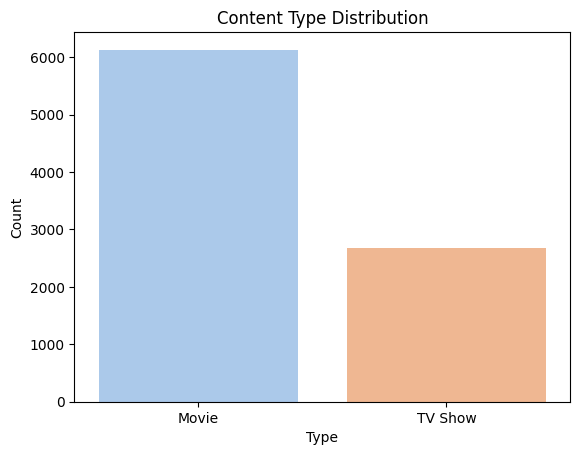

In [100]:
# Visualization 1: Content Type (Movie vs TV Show)
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

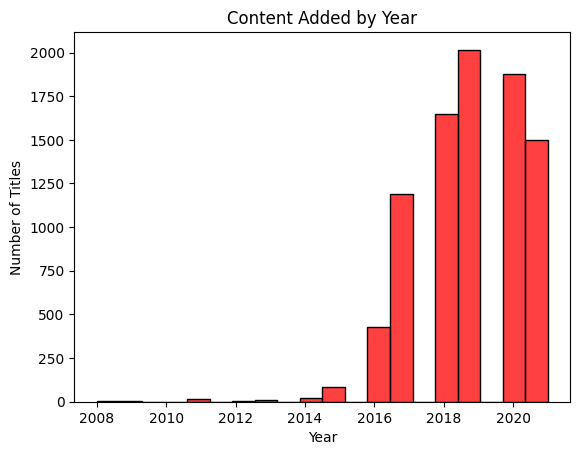

In [101]:
# Visualization 2: Year-wise content added
sns.histplot(df['year_added'].dropna(), bins=20, kde=False, color='red')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

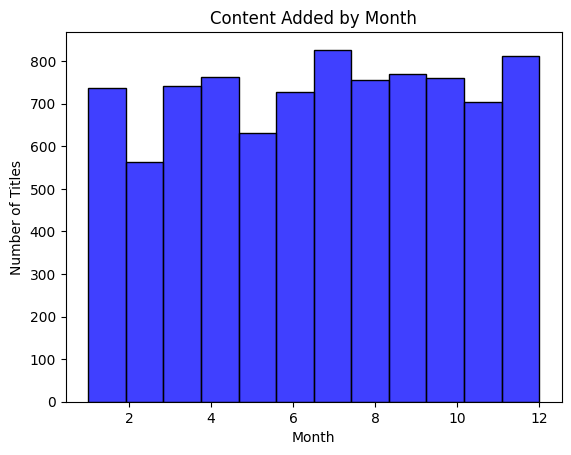

In [102]:
# Visualization 3: Month-wise content added
sns.histplot(df['month_added'].dropna(), bins=12, kde=False, color='blue')
plt.title('Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()

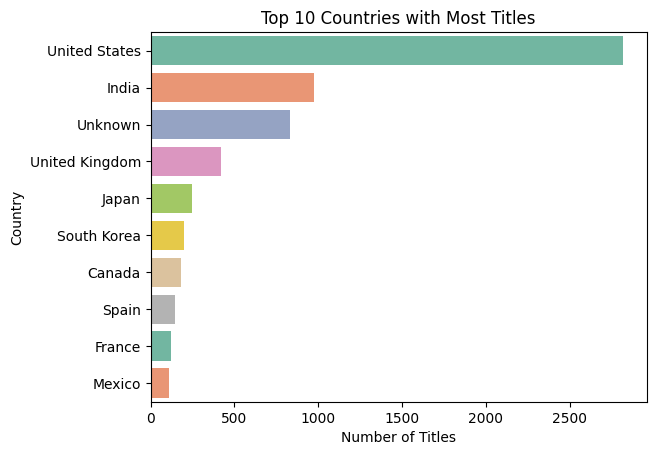

In [103]:
# Visualization 4: Top 10 Countries with Most Titles
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set2')
plt.title('Top 10 Countries with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

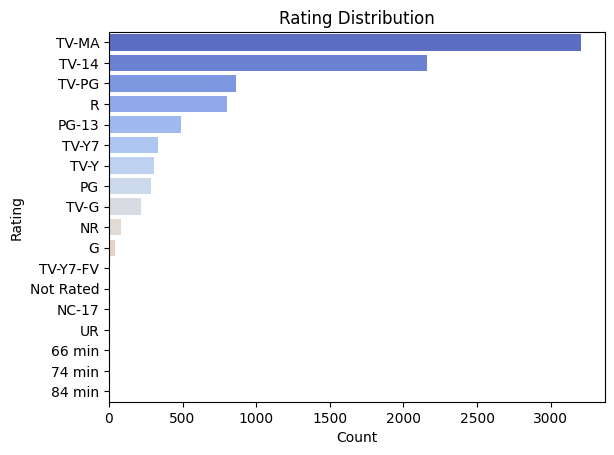

In [104]:
# Visualization 5: Rating Distribution
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

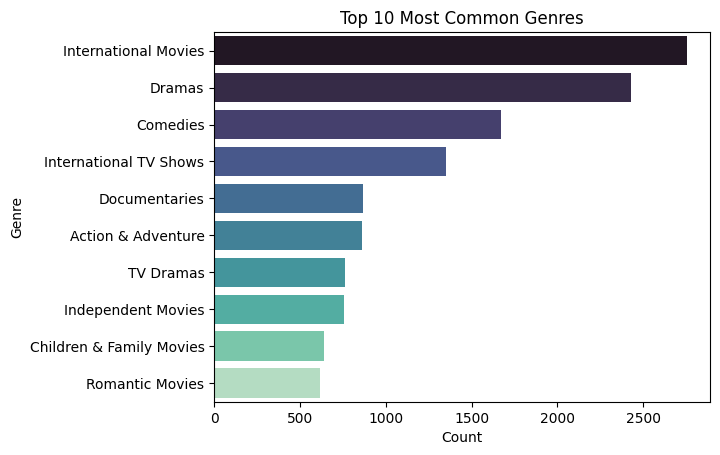

In [105]:
# Visualization 6: Top 10 Most Common Genres
genres, counts = zip(*top_genres)
sns.barplot(x=list(counts), y=list(genres), palette='mako')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

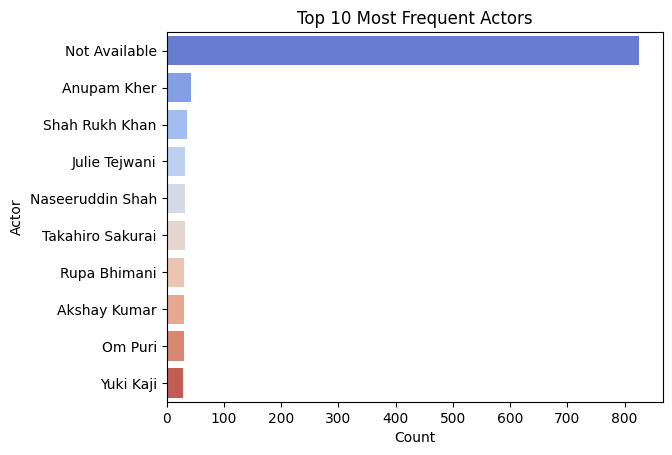

In [106]:
# Visualization 7: Top 10 Most Frequent Actors
actors, actor_counts = zip(*top_actors)
sns.barplot(x=list(actor_counts), y=list(actors), palette='coolwarm')
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

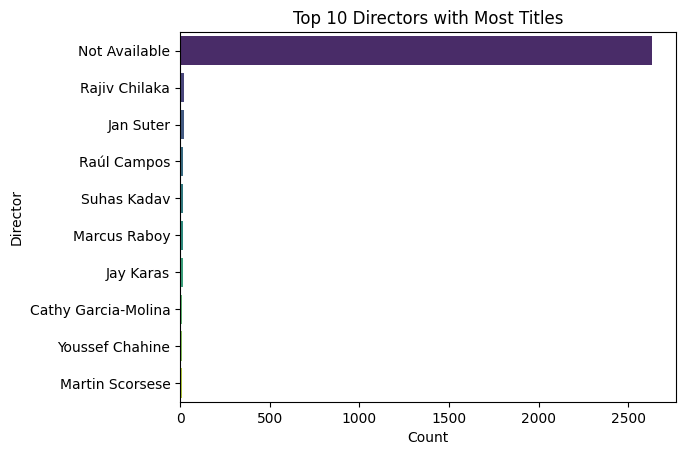

In [107]:
# Visualization 8: Top 10 Directors with Most Titles
directors, director_counts = zip(*top_directors)
sns.barplot(x=list(director_counts), y=list(directors), palette='viridis')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

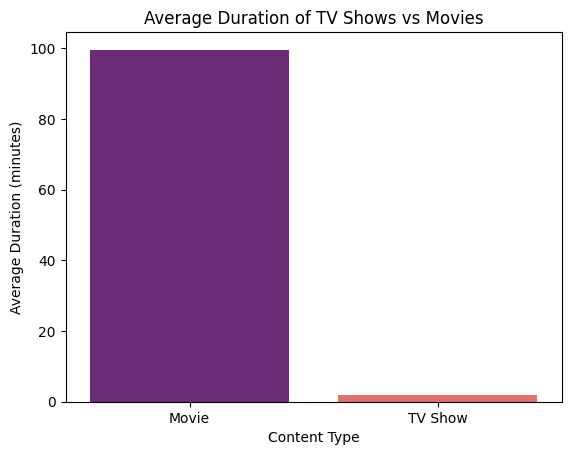

In [108]:
# Visualization 9: TV Show vs Movie Duration Comparison
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')  # Ensure it's numeric
average_duration = df.groupby('type')['duration_num'].mean()

sns.barplot(x=average_duration.index, y=average_duration.values, palette='magma')
plt.title('Average Duration of TV Shows vs Movies')
plt.xlabel('Content Type')
plt.ylabel('Average Duration (minutes)')
plt.show()

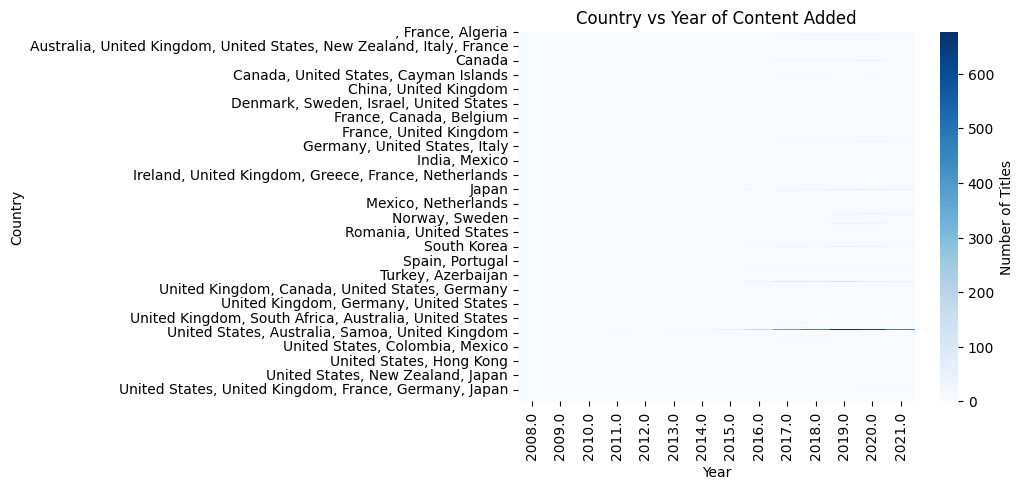

In [109]:
# Visualization 10: Heatmap - Country vs Year of Content Added
country_year = df.groupby(['country', 'year_added']).size().unstack(fill_value=0)
sns.heatmap(country_year, cmap='Blues', cbar_kws={'label': 'Number of Titles'})
plt.title('Country vs Year of Content Added')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()